### Linear Classifier in Pure Tensorflow

In [1]:
# Imports
import numpy as np
import tensorflow as tf

2024-07-04 07:29:45.819664: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-04 07:29:46.313709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-04 07:29:47.851762: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Genearate Dummy Data

In [34]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
    )
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
    )

In [8]:
# Stacking data into one array of shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)


In [10]:
# Generate corresponding labels
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype=np.float32), 
    np.ones((num_samples_per_class, 1), dtype="float32")
    ))

### Visualize Data

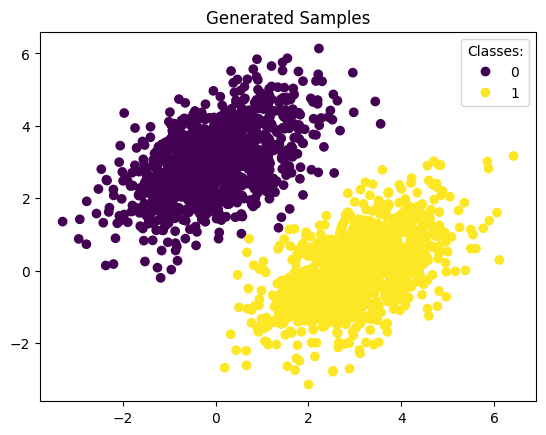

In [33]:
import matplotlib.pyplot as plt
scatter = plt.scatter(inputs[:, 0], inputs[:, 1], c=targets)
plt.title("Generated Samples")
plt.legend(*scatter.legend_elements(), title="Classes:")
plt.show()

### Build a Linear Classifier
prediction = W.dot(inputs) + b

In [35]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [41]:
# Define forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

In [45]:
# Mean Squared Error Loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)   # an array of squared errors 
    return tf.reduce_mean(per_sample_losses)                # scalar average of per_sample_losses

In [43]:
# Training function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss


In [47]:
# Best Practice: shuffle data before training your models
# Batch training loop
for epoch in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at epoch: {loss:.4f}")
# Model seems to have reached min loss of 0.0239 (on the current run)   

Loss at epoch: 0.0274
Loss at epoch: 0.0271
Loss at epoch: 0.0268
Loss at epoch: 0.0265
Loss at epoch: 0.0263
Loss at epoch: 0.0261
Loss at epoch: 0.0259
Loss at epoch: 0.0257
Loss at epoch: 0.0255
Loss at epoch: 0.0254
Loss at epoch: 0.0252
Loss at epoch: 0.0251
Loss at epoch: 0.0250
Loss at epoch: 0.0249
Loss at epoch: 0.0248
Loss at epoch: 0.0247
Loss at epoch: 0.0246
Loss at epoch: 0.0245
Loss at epoch: 0.0245
Loss at epoch: 0.0244
Loss at epoch: 0.0243
Loss at epoch: 0.0243
Loss at epoch: 0.0242
Loss at epoch: 0.0242
Loss at epoch: 0.0242
Loss at epoch: 0.0241
Loss at epoch: 0.0241
Loss at epoch: 0.0241
Loss at epoch: 0.0240
Loss at epoch: 0.0240
Loss at epoch: 0.0240
Loss at epoch: 0.0240
Loss at epoch: 0.0240
Loss at epoch: 0.0239
Loss at epoch: 0.0239
Loss at epoch: 0.0239
Loss at epoch: 0.0239
Loss at epoch: 0.0239
Loss at epoch: 0.0239
Loss at epoch: 0.0239


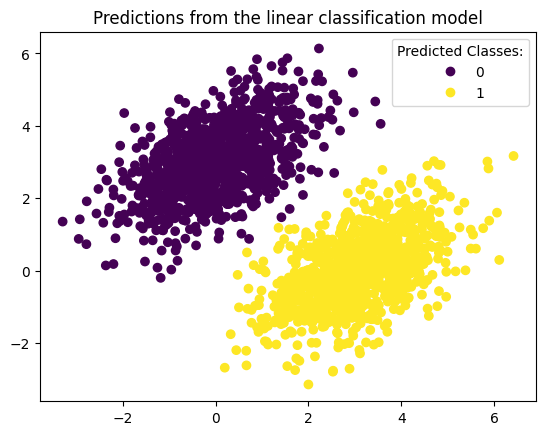

In [60]:
# We are doing a binary classification.
# So, predictions are labelled as 0 (negative) if the probability is less than 0.5 and as 1 (positive) otherwise

predictions = model(inputs)

scatter = plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

plt.title("Predictions from the linear classification model")

plt.legend(*scatter.legend_elements(), title="Predicted Classes:")

plt.show()

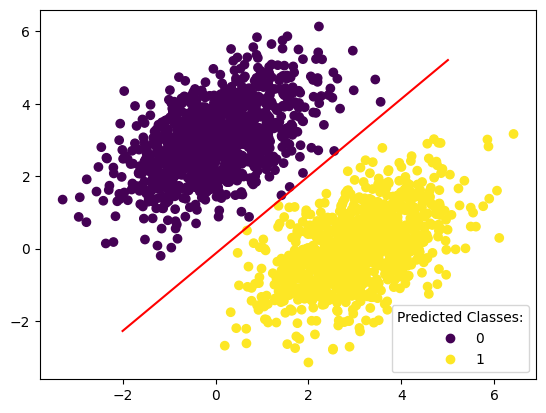

In [66]:
# Plot the line separating the two classes
x = np.linspace(-2, 5, 100) # generate 100 regularly spaced numbers between -2 and 5
y = - W[0] / W[1] * x + (0.5 - b) / W[1] # Equation line

plt.plot(x, y, "-r")

scatter = plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.legend(*scatter.legend_elements(), title="Predicted Classes:")